<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

# Importações


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

import warnings
warnings.filterwarnings('ignore')

## Leitura dos dados

In [ ]:
dados = pd.read_csv('Consumo_cerveja.csv', sep = ';')

## Visualizar os dados


In [ ]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificar o tamanho do dataset


In [ ]:
dados.shape

(365, 7)

## Analises Preliminares


In [ ]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

In [ ]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


## Comportamento da Variavel Dependente (Y)

In [ ]:
(x, y) = (28, 11)

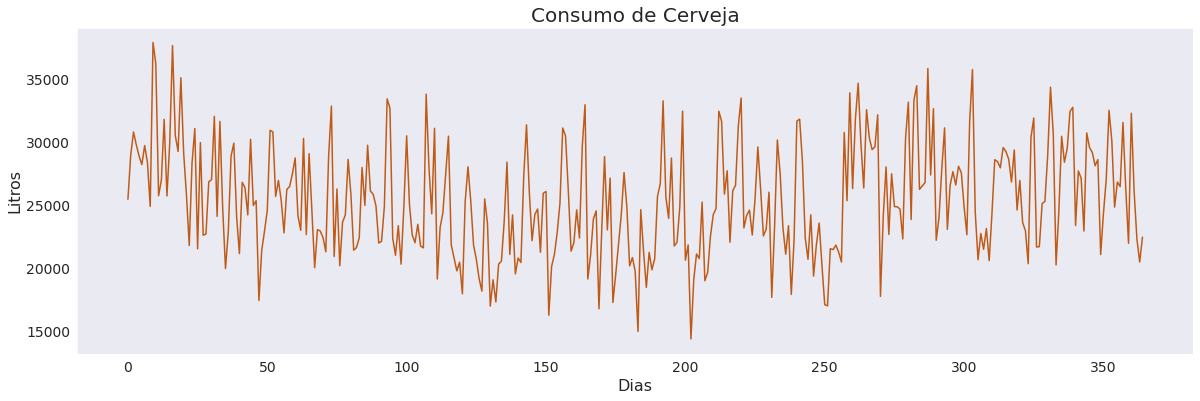

In [ ]:
fig, ax = plt.subplots(figsize =(20, 6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

## BoxPlot

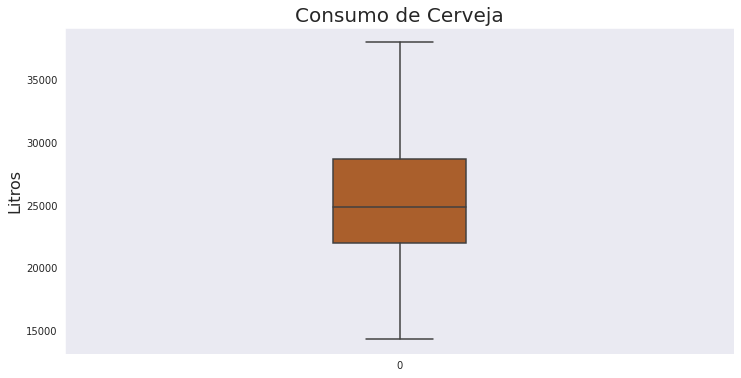

In [ ]:
ax = sns.boxplot(data=dados['consumo'], width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize = 16)
ax


## BoxPlot 2 variaveis

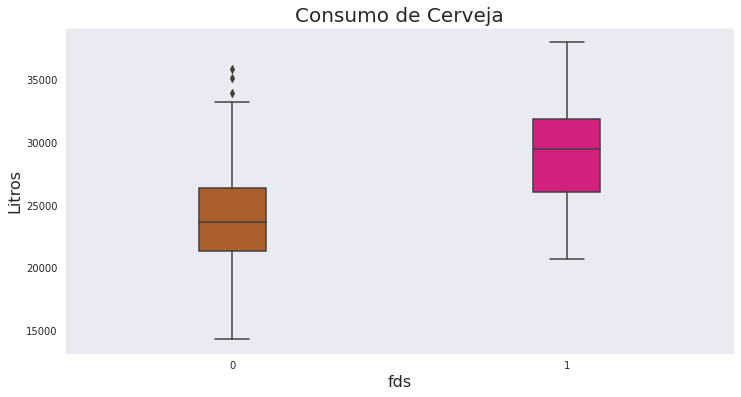

In [ ]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('fds', fontsize = 16)
sns.set_palette("Accent_r")
sns.set_style("dark")
ax


## Distribuição de Frequencias

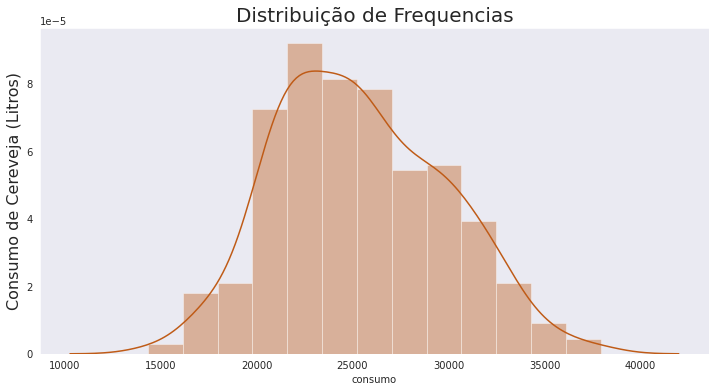

In [ ]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequencias', fontsize=20)
ax.set_ylabel('Consumo de Cereveja (Litros)', fontsize = 16)
ax


## Variável Dependente X Variáveis Explicativas (pairplot)

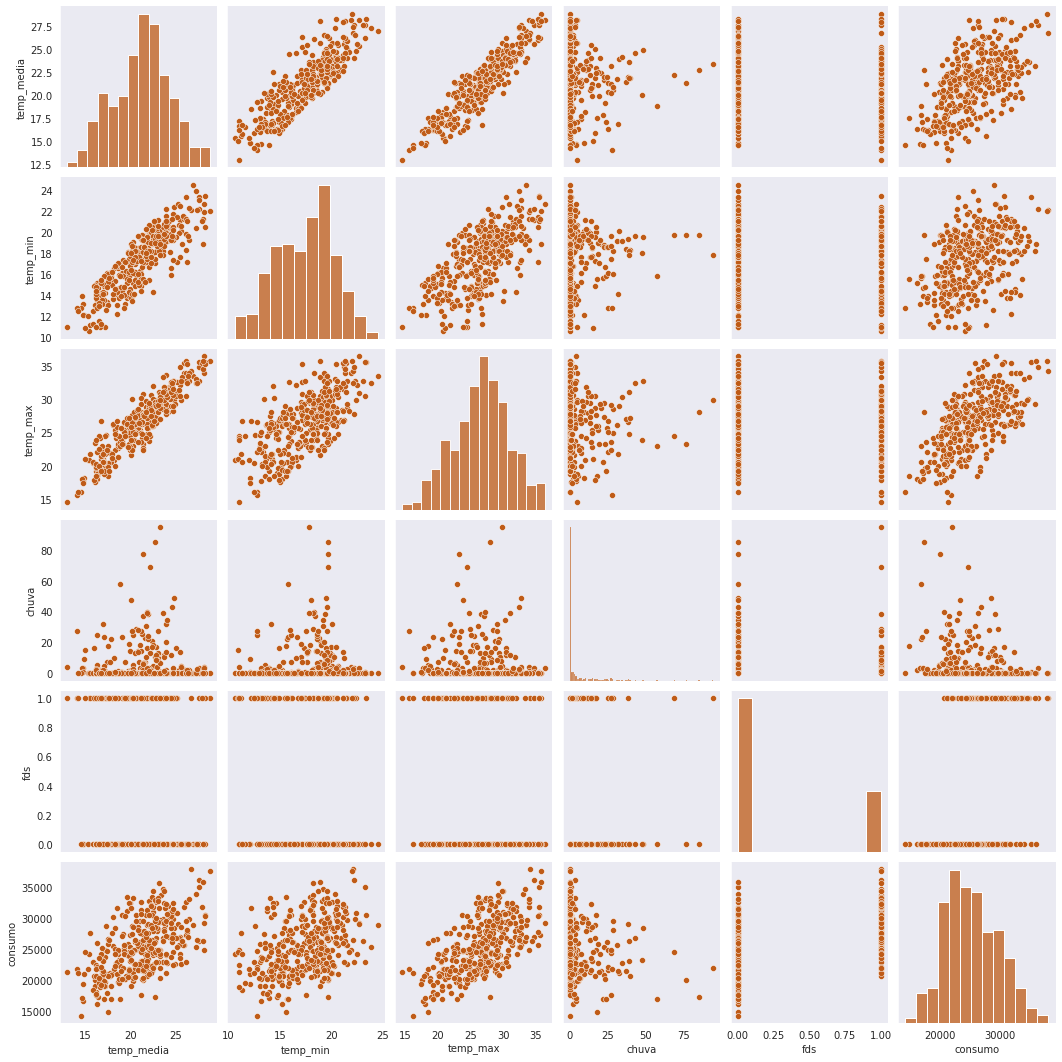

In [ ]:
ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

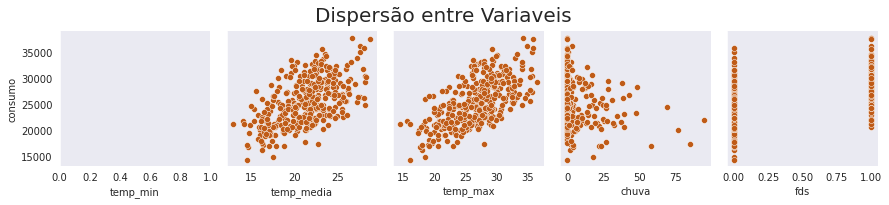

In [ ]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min','temp_media', 'temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre Variaveis', fontsize=20, y=1.10)
ax

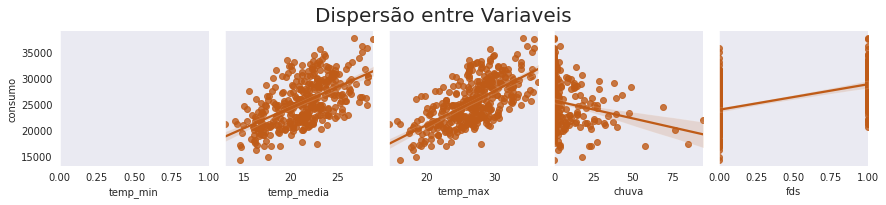

In [ ]:
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min','temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
ax.fig.suptitle('Dispersão entre Variaveis', fontsize=20, y=1.10)
ax

## Variável Dependente X Variáveis Explicativas (jointplot)

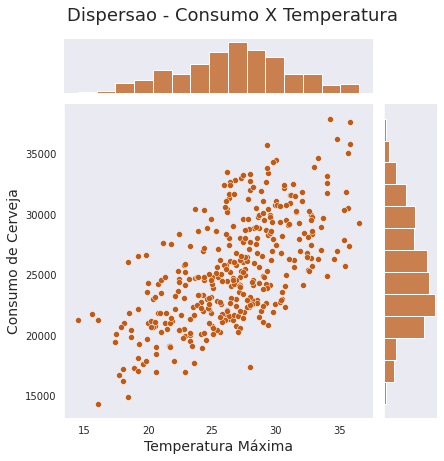

In [ ]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

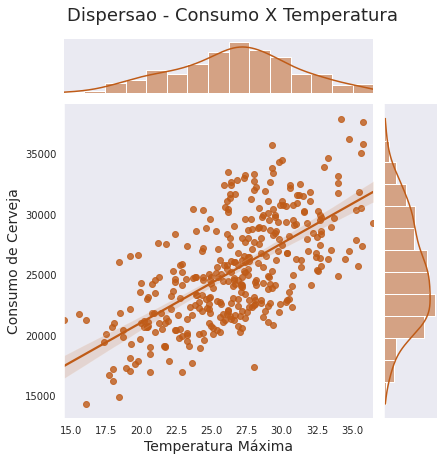

In [ ]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')
ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

## Variavel Dependente x Variavel Explicativa (Implot)


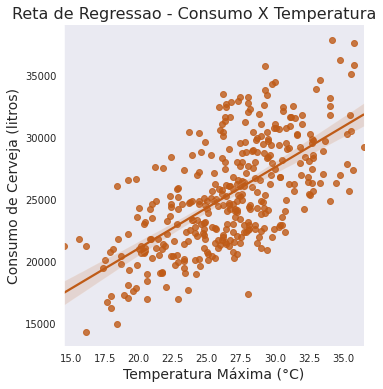

In [ ]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

# Utilizando uma terceira varaivel na analise (tipo 1)


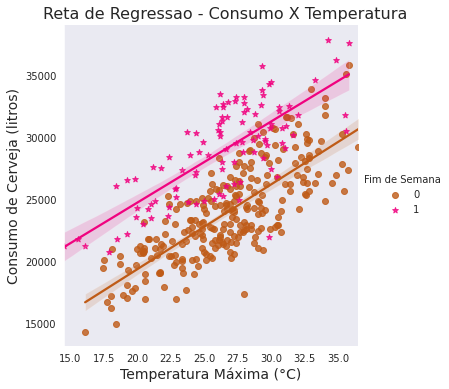

In [ ]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=['o','*'], legend=False)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")
ax

# Utilizando uma terceira varaivel na analise (tipo 2)

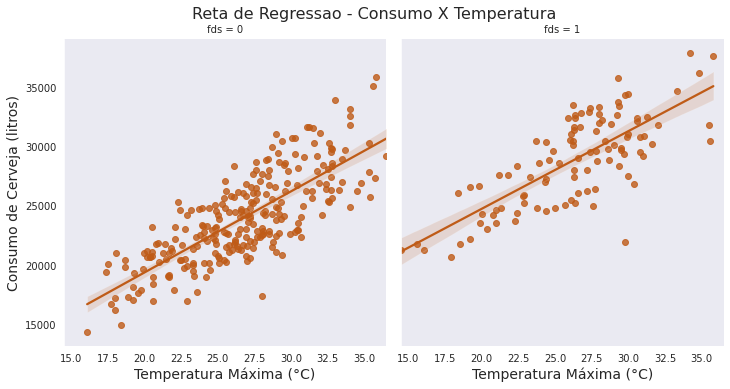

In [ ]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

## Estimando um modelo Regressão Linear




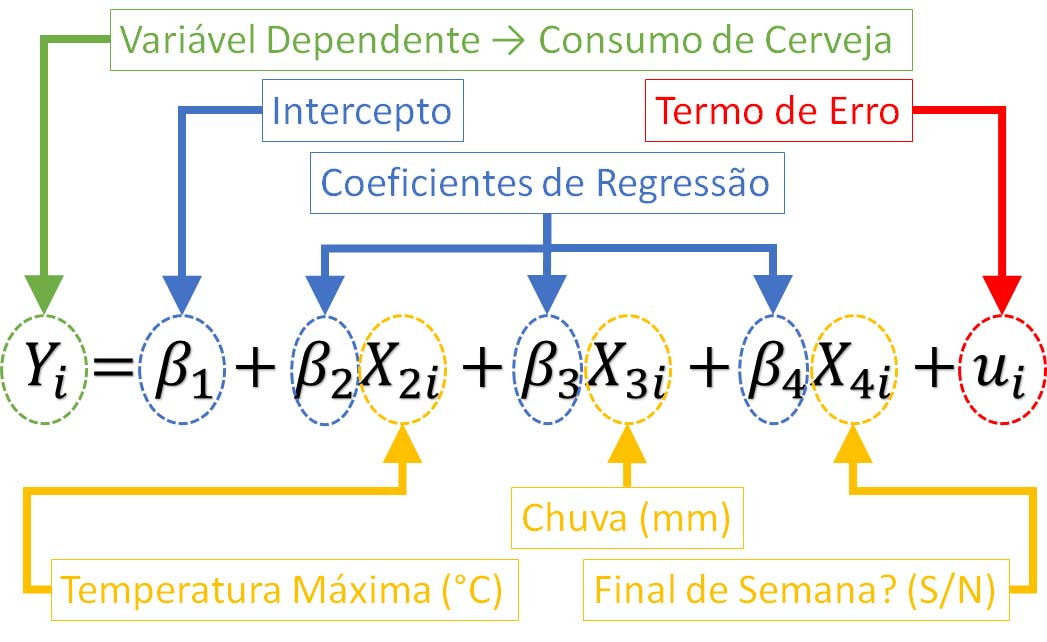



In [ ]:
y = dados['consumo'] #dependente

In [ ]:
X = dados[['temp_max','chuva','fds']] # explicativas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)  # test_size=0.3 (30% do dados para teste) 

In [ ]:
X_train.shape

(255, 3)

In [ ]:
X_test.shape

(110, 3)

In [ ]:
X_train.shape[0] + X_test.shape[0]

365

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))  # O coeficiente de Determinação(R²) é uma medida resumida que diz quanto a linha de regressão ajusta se aos dados. (É UM VALOR DE 0 A 1)

R² = 0.73


# Gerar previsões


In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


# Obter previsões


In [ ]:
entrada = X_test[0:1]

In [ ]:
#GERANDO PREVISÃO PONTUAL

modelo.predict(entrada)[0]

26094.901775262017

# Criando um simulador


In [ ]:
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


#Criando uma lista com os nomes das variaveis do modelo

In [ ]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [ ]:
index = ['Indercepto', 'Temperatura Maxima', 'Chuva (mm)', 'Final de Semana']

data frame para armazenar os coeficientes do modelo


In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns = ['Paramentros'])

,Paramentros
Indercepto,5951.976339
Temperatura Maxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Obtendo o intercepto do modelo e obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>


##Analise Graficas das Previsões do modelo

In [ ]:
y_previsto_train = modelo.predict(X_train)

## Grafico de dispersão entre valor estimado e valor real

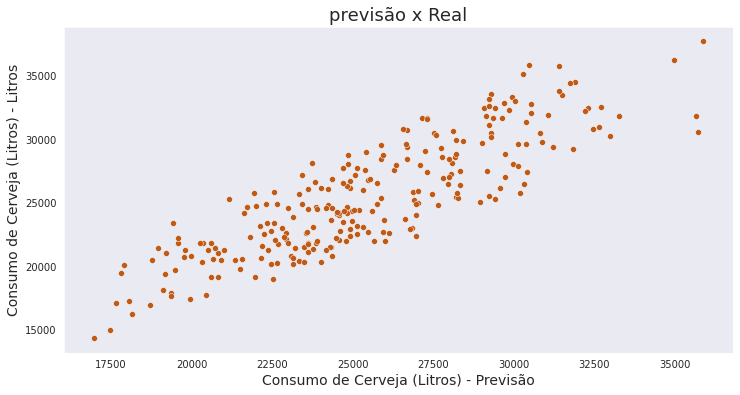

In [ ]:

ax = sns.scatterplot(y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('previsão x Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (Litros) - Litros', fontsize=14)
ax

## Obtendo o residuo

In [ ]:
residuo = y_train - y_previsto_train

## Grafico de dispersão entre o valor estimado e residuo 

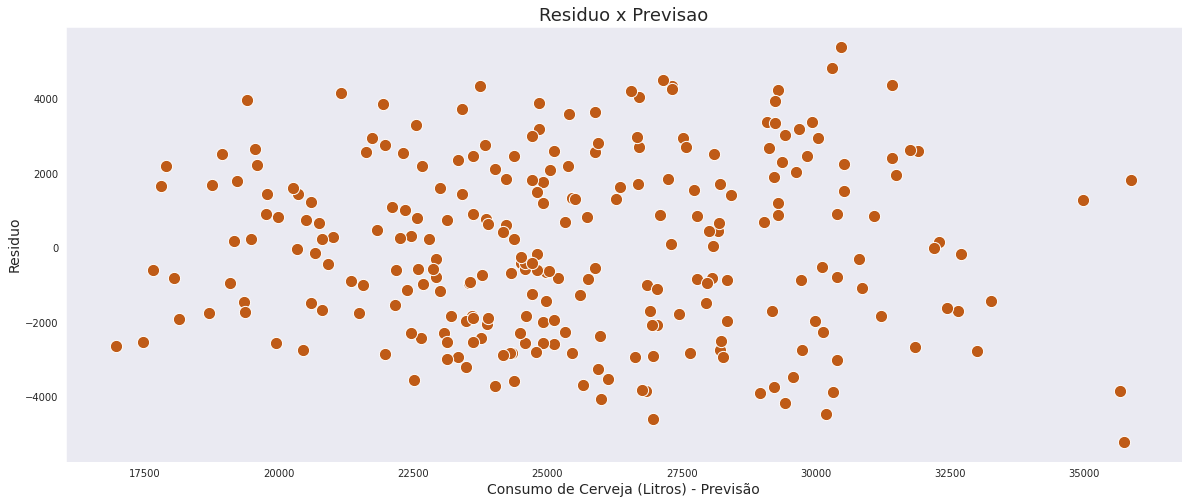

In [ ]:
ax = sns.scatterplot(y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20,8)

ax.set_title('Residuo x Previsao', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Residuo', fontsize=14)
ax

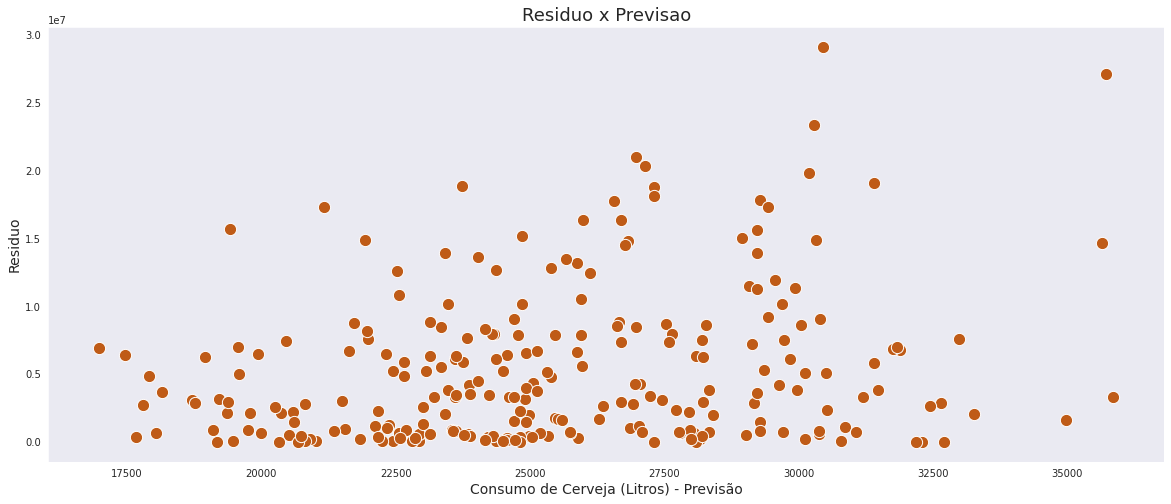

In [ ]:
ax = sns.scatterplot(y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20,8)

ax.set_title('Residuo x Previsao', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Residuo', fontsize=14)
ax

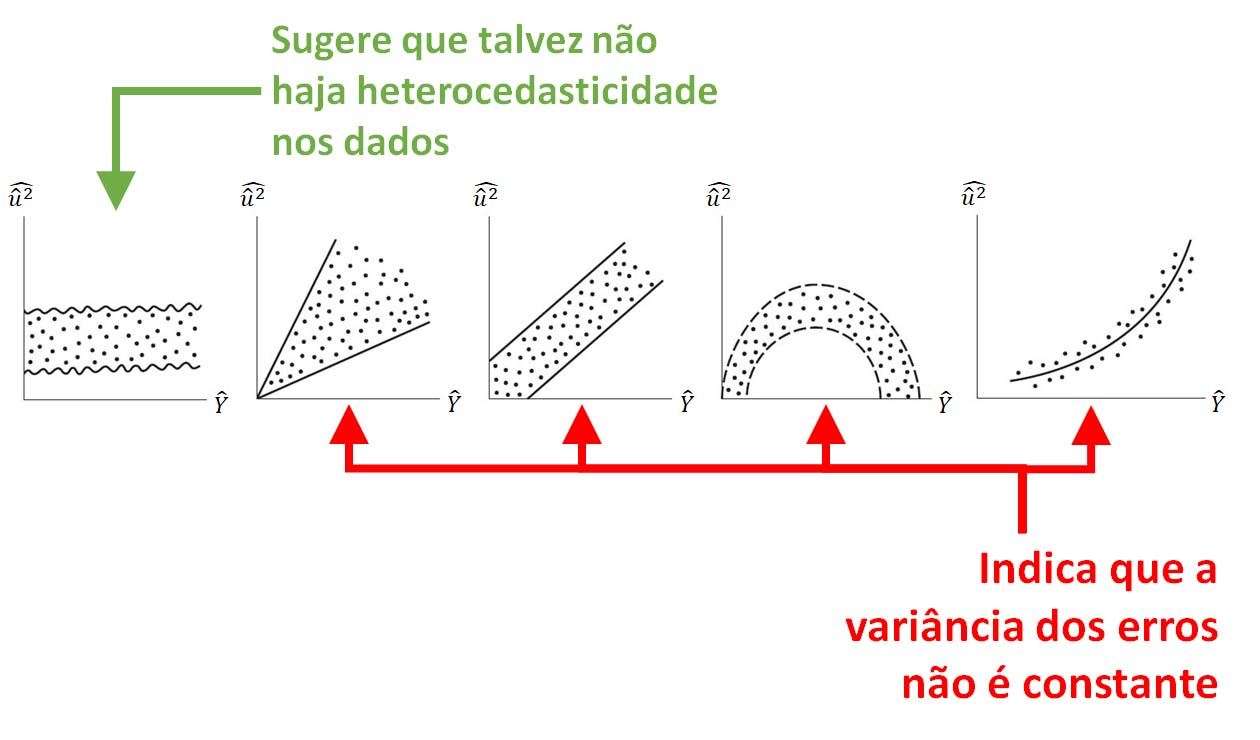

## Plotando a distribuição de frequencias do residuos

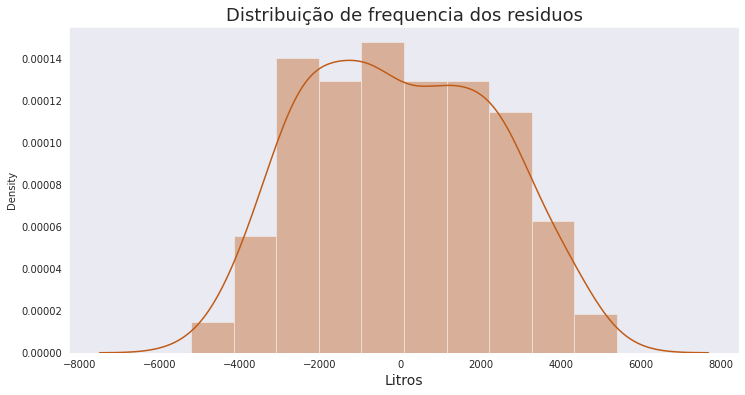

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequencia dos residuos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

## Comparando Modelos

Estimando um novo movelo com substitução da variavel explicativa temperatura maxima pela temperatura media.

In [ ]:
X2 = dados[['temp_media', 'chuva', 'fds']]

Criando os datasets de treino e testes.

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)


Instanciando a classe LinearRegressiando()

In [ ]:
modelo_2 = LinearRegression()

Utilizando o metodo fit para estimar

In [ ]:
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Obtendo o coeficiente de determinação R² do novo modelo estimando e comparando com o modelo anterior

In [ ]:
print('Modelo com Temp. Media')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. Media
R² = 0.66


In [ ]:
print('Modelo com Temp. Maxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. Maxima
R² = 0.73


Gerando previsões para dados de teste ultilando o predict() do modelo 1 e 2

In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

Obtendo o coeficiente de determinação R² para a previsao dos dois modelos


In [ ]:
print('Modelo com Temp. Media')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto_2).round(2)))

Modelo com Temp. Media
R² = 0.66


In [ ]:
print('Modelo com Temp. Maxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Temp. Maxima
R² = 0.69


## Outras metricas de regressão ( Coeficiente de determinação; Erro quadrático médio; e Raiz do erro quadrático médio


Obtendo metricas para o modelo com temperatura media.

In [ ]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)  #RAIZ DO ERRO QUADRADITO MEDIO
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Metricas'])

,Metricas
EQM,6060775.46
REQM,2461.86
R²,0.66


Obtendo metricas para o modelo com temperatura maxima

In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)  #RAIZ DO ERRO QUADRADITO MEDIO
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Metricas'])

,Metricas
EQM,5471976.38
REQM,2339.23
R²,0.69


## SALVANDO E CARREGANDO O MODELO ESTIMADO

In [ ]:
output = open('modelo_consumo_ceveja_gabi', 'wb')
pickle.dump(modelo, output)
output.close()